https://github.com/mohamadnajjari

This code serves as a visual demonstration of different image processing operations applied to a cat image, showcasing the effects of darkening, lightening, inverting, adjusting contrast, and converting to grayscale. It's a useful example for understanding basic image processing techniques using OpenCV and NumPy.

In [18]:
import numpy as np
from glob import glob
import cv2
import matplotlib.pyplot as plt

In [19]:
#  Uses OpenCV (cv2) to read the image file and stores the pixel values in the variable original_image. The image is read in the BGR color format by default.
# next Converts the color format of the image from BGR to RGB using OpenCV's cv2.cvtColor function. This step is necessary because Matplotlib expects images in RGB format.

def load_and_display_original_image():
    original_image = cv2.imread('party.jpg')
    original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    fig, ax = plt.subplots()
    ax.imshow(original_image_rgb)
    ax.set_title('Original Image')
    plt.show()
    return original_image_rgb

In [20]:
# image_darken: Darken the image by subtracting 128 from each pixel intensity. Values are then clipped between 0 and 255.
# image_lighten: Lighten the image by adding 128 to each pixel intensity. Values are then clipped between 0 and 255.
# image_invert: Invert the image by subtracting each pixel intensity from 255. Values are then clipped between 0 and 255.
# image_low_contrast: Create a low-contrast version of the image by halving pixel intensities. Values are then clipped between 0 and 255.
# image_high_contrast: Create a high-contrast version of the image by doubling pixel intensities. Values are then clipped between 0 and 255.
# image_grayscale: Convert the image to grayscale using a weighted combination of color channels (0.3 * R + 0.6 * G + 0.1 * B). Values are then clipped between 0 and 255.
def apply_image_processing_operations(original_image_rgb):
    image_darken = np.clip(original_image_rgb.astype(np.int16) - 128, 0, 255).astype(np.uint8)
    image_lighten = np.clip(original_image_rgb.astype(np.int16) + 128, 0, 255).astype(np.uint8)
    image_invert = np.clip(255 - original_image_rgb.astype(np.int16), 0, 255).astype(np.uint8)
    image_low_contrast = np.clip(original_image_rgb.astype(np.int16) / 2, 0, 255).astype(np.uint8)
    image_high_contrast = np.clip(original_image_rgb.astype(np.int16) * 2, 0, 255).astype(np.uint8)
    image_grayscale = np.clip(0.3 * original_image_rgb[:, :, 0] + 0.6 * original_image_rgb[:, :, 1] + 0.1 * original_image_rgb[:, :, 2], 0, 255)

    return image_darken, image_lighten, image_invert, image_low_contrast, image_high_contrast, image_grayscale

In [21]:
# function takes a tuple of processed images and displays them in a 2x3 grid using Matplotlib. 
# The nested loop (for i in range(2): and for j in range(3):) iterates over the rows and columns of the subplot grid.
# cmap = 'gray' if titles[index] == 'Grayscale Image' else None: Sets the colormap (cmap) to 'gray' for the grayscale image and None for others.
def display_processed_images(processed_images):
    fig, ax = plt.subplots(2, 3, figsize=(10, 5))
    titles = ['Darken Image', 'Lighten Image', 'Invert Image', 'Low Contrast Image', 'High Contrast Image', 'Grayscale Image']

    for i in range(2):
        for j in range(3):
            index = i * 3 + j
            cmap = 'gray' if titles[index] == 'Grayscale Image' else None
            ax[i, j].imshow(processed_images[index], cmap=cmap)
            ax[i, j].set_title(titles[index])
    
    plt.show()

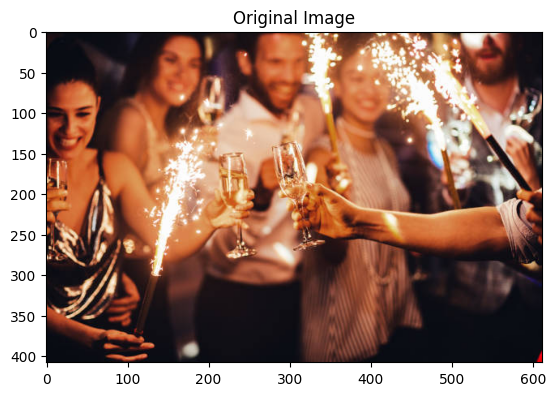

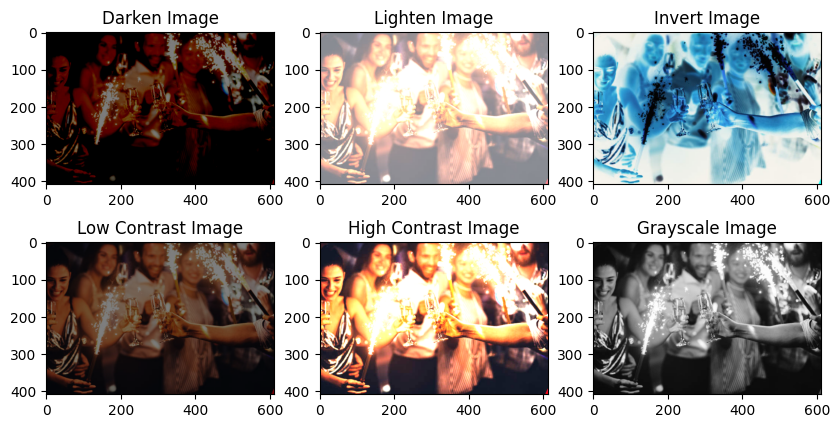

In [22]:
# call functions and run the prgram
original_image_rgb = load_and_display_original_image()
processed_images = apply_image_processing_operations(original_image_rgb)
display_processed_images(processed_images)